In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load files
antelope_pos = np.load('/home/esther/shared/2019-03-30_antelope.npy')
antelope_neg = np.load('/home/esther/shared/2019-03-10_antelope.npy')
elsinore_pos = np.load('/home/esther/shared/2019-03-25_elsinore.npy')
elsinore_neg = np.load('/home/esther/shared/2019-04-24_elsinore.npy')
grassmtn_pos = np.load('/home/esther/shared/2019-03-18_grassmtn.npy')
grassmtn_neg = np.load('/home/esther/shared/2019-04-27_grassmtn.npy')

In [3]:
#initialize boolean arrays to keep track of which pixels were labelled

antelope_pospix_iter0 = np.zeros(antelope_pos[:,:,0].shape)
antelope_pospix_iter0 = antelope_pospix_iter0 > 0

antelope_negpix_iter0 = np.zeros(antelope_neg[:,:,0].shape)
antelope_negpix_iter0 = antelope_negpix_iter0 > 0

elsinore_pospix_iter0 = np.zeros(elsinore_pos[:,:,0].shape)
elsinore_pospix_iter0 = elsinore_pospix_iter0 > 0

elsinore_negpix_iter0 = np.zeros(elsinore_neg[:,:,0].shape)
elsinore_negpix_iter0 = elsinore_negpix_iter0 > 0

grassmtn_pospix_iter0 = np.zeros(grassmtn_pos[:,:,0].shape)
grassmtn_pospix_iter0 = grassmtn_pospix_iter0 > 0

grassmtn_negpix_iter0 = np.zeros(grassmtn_neg[:,:,0].shape)
grassmtn_negpix_iter0 = grassmtn_negpix_iter0 > 0

In [4]:
#plot image

def show_image(img):
    
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    
    #plot true color image (saturated to emphasize orange color)
    rgb = ax[0].imshow(np.minimum(img[:, :, [3,2,1]] * 5, 1))
    
    #plot red channel only
    ch4 = ax[1].imshow(np.minimum(img[:, :, 3] * 5, 1))
    
    ax[0].grid()
    ax[1].grid()
    
    return fig, ax

In [5]:
#plot subsets

def show_subsets(subsets, threshs):
    
    n = len(subsets)
    
    fig, axs = plt.subplots(nrows=3, ncols=n, figsize=(15, 7))
    
    for i, (subset, thresh) in enumerate(zip(subsets, threshs)):
        
        #get rgb and channel 4 for images
        subset_rgb = subset[:, :, [3,2,1]]
        subset_ch4 = subset[:, :, 3]
        
        #get thresholded image
        tmp = np.zeros(subset_ch4.shape)
        tmp[subset_ch4 > thresh] = subset_ch4[subset_ch4 > thresh]

        #plot true color subsets (saturated to emphasize orange color)
        rgb = axs[0, i].imshow(np.minimum(subset_rgb * 5, 1))
        
        #plot red channel only
        ch4 = axs[1, i].imshow(subset_ch4)
        
        #plot thresholded image
        th = axs[2, i].imshow(tmp)
        
        #add colorbars
        fig.colorbar(rgb, ax=axs[0, i])
        fig.colorbar(ch4, ax=axs[1, i])
        fig.colorbar(th, ax=axs[2, i])


In [6]:
#get all the positive poppy pixels from an image subset

def get_pos(subset, thresh):
    
    #get row and column indices of pixels that have poppies
    idx_row, idx_col = np.nonzero(subset[:,:,3] > thresh)

    #preallocate array to store positive poppy pixel data
    positive_poppy_pixels = np.random.random((len(idx_row),13))

    #pull out all 13 channels for each positive poppy pixel and put into array
    for i, (row, col) in enumerate(zip(idx_row, idx_col)):
        positive_poppy_pixels[i, :] = subset[row, col, :]
    #(not the best or most efficient way of doing this but works for now)
        
    return positive_poppy_pixels

In [7]:
#get n random pixels from negative image

def get_neg(img, n, img_bool):
    
    #get index values for each pixel
    idx = [index for index in np.ndindex(antelope_neg[:,:,0].shape)]
    
    #randomly shuffle order and elect the top n indices
    rng = np.random.default_rng(seed=1)
    rng.shuffle(idx)
    idx = idx[0:n]
    
    #preallocate array to store data from selected pixels
    poppy_neg = np.empty((n, 13))
    
    #for each pixel get data and update boolean array
    for counter, i in enumerate(idx):
        poppy_neg[counter, :] = img[i[0], i[1], :]
        img_bool[i] = True
        
    return poppy_neg


# Start by hand labelling a subset of poppy pixels from the three locations

## Antelope Valley

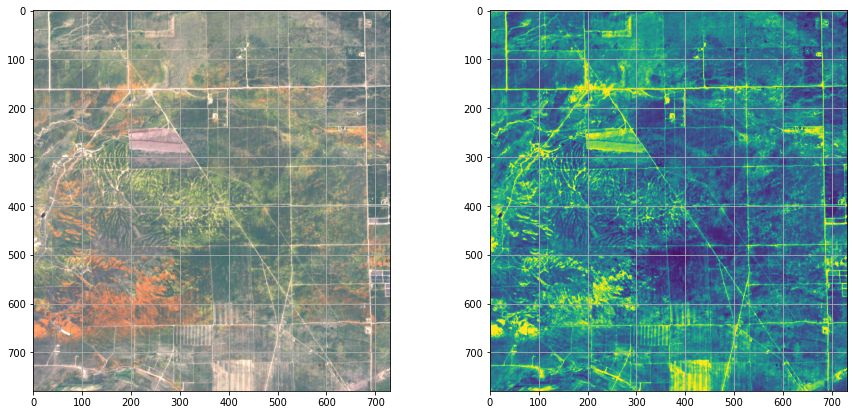

In [8]:
fig, ax = show_image(antelope_pos)

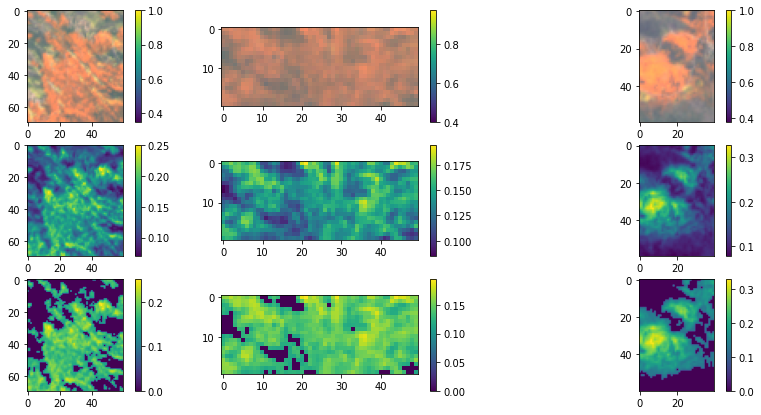

In [9]:
#define subsets and subset thresholds
subset1 = antelope_pos[530:600, 200:260, :]
subset2 = antelope_pos[610:630, 150:200, :]
subset3 = antelope_pos[620:680, 0:40, :]
subsets_antelope = [subset1, subset2, subset3]
threshs_antelope = [0.14, 0.115, 0.12]

#visualize
show_subsets(subsets_antelope, threshs_antelope)

#update boolean array
tmp1 = antelope_pos[:,:,3] > threshs_antelope[0]
tmp2 = antelope_pos[:,:,3] > threshs_antelope[1]
tmp3 = antelope_pos[:,:,3] > threshs_antelope[2]
antelope_pospix_iter0[530:600, 200:260] = tmp1[530:600, 200:260]
antelope_pospix_iter0[610:630, 150:200] = tmp2[610:630, 150:200]
antelope_pospix_iter0[620:680, 0:40] = tmp3[620:680, 0:40]

# Lake Elsinore

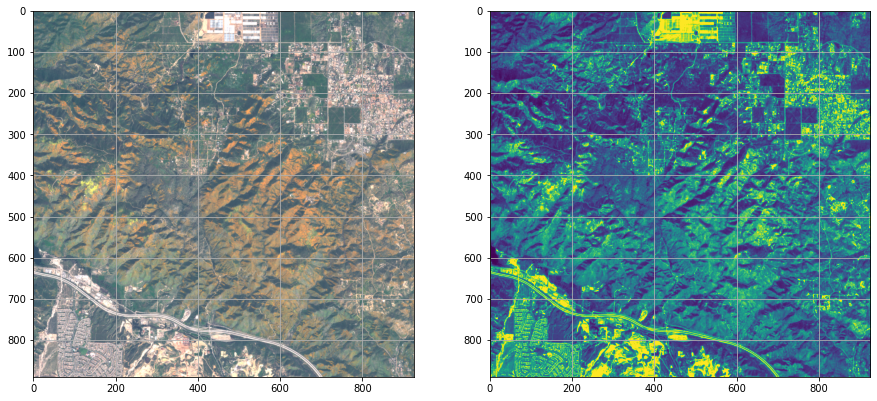

In [10]:
fig, ax = show_image(elsinore_pos)

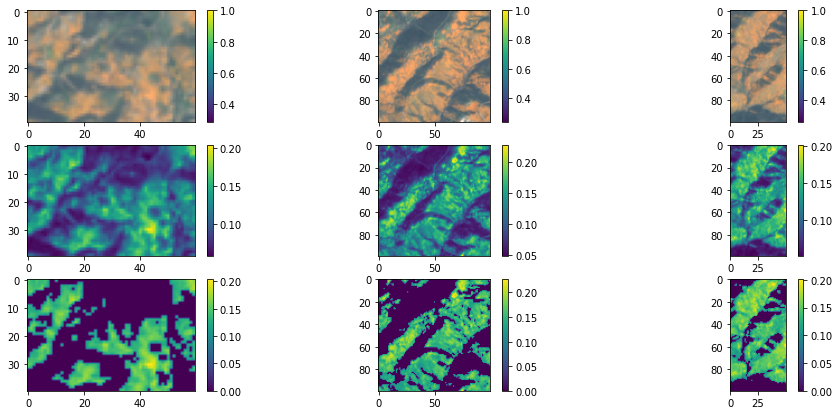

In [11]:
#define subsets and subset thresholds
subset1 = elsinore_pos[100:140, 200:260, :]
subset2 = elsinore_pos[350:450, 550:650, :]
subset3 = elsinore_pos[480:580, 600:650, :]
subsets_elsinore = [subset1, subset2, subset3]
threshs_elsinore = [0.12, 0.115, 0.1]

#visualize
show_subsets(subsets_elsinore, threshs_elsinore)

#update boolean array
tmp1 = elsinore_pos[:,:,3] > threshs_elsinore[0]
tmp2 = elsinore_pos[:,:,3] > threshs_elsinore[1]
tmp3 = elsinore_pos[:,:,3] > threshs_elsinore[2]
elsinore_pospix_iter0[100:140, 200:260] = tmp1[100:140, 200:260]
elsinore_pospix_iter0[350:450, 550:650] = tmp2[350:450, 550:650]
elsinore_pospix_iter0[480:580, 600:650] = tmp3[480:580, 600:650]

## Grass Mountain

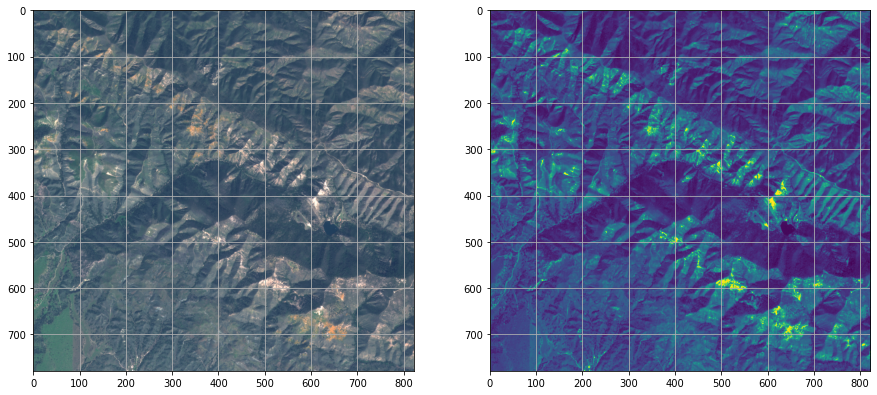

In [12]:
fig, ax = show_image(grassmtn_pos)

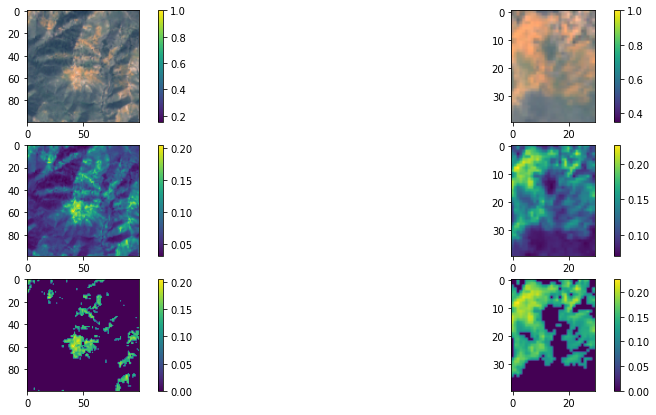

In [13]:
#define subsets and subset thresholds
subset1 = grassmtn_pos[200:300, 300:400, :]
subset2 = grassmtn_pos[680:720, 640:670, :]
subsets_grassmtn = [subset1, subset2]
threshs_grassmtn = [0.12, 0.115]

#visualize
show_subsets(subsets_grassmtn, threshs_grassmtn)

#update boolean array
tmp1 = grassmtn_pos[:,:,3] > threshs_grassmtn[0]
tmp2 = grassmtn_pos[:,:,3] > threshs_grassmtn[1]
grassmtn_pospix_iter0[200:300, 300:400] = tmp1[200:300, 300:400]
grassmtn_pospix_iter0[680:720, 640:670] = tmp2[680:720, 640:670]

In [14]:
#contatenate all subset info into lists
subsets = subsets_antelope + subsets_elsinore + subsets_grassmtn
threshs = threshs_antelope + threshs_elsinore + threshs_grassmtn

In [15]:
#get all the positive poppy pixels from all image subsets

poppy_pos = np.empty((0,13)) #initialize array

for subset, thresh in zip(subsets, threshs):
    
    positive_poppy_pixels_subset = get_pos(subset, thresh)
    poppy_pos = np.append(poppy_pos, positive_poppy_pixels_subset, axis=0)

# Now get a random assortment of pixels from images with no poppies in them - same locations as above but before poppy season

## Antelope Valley

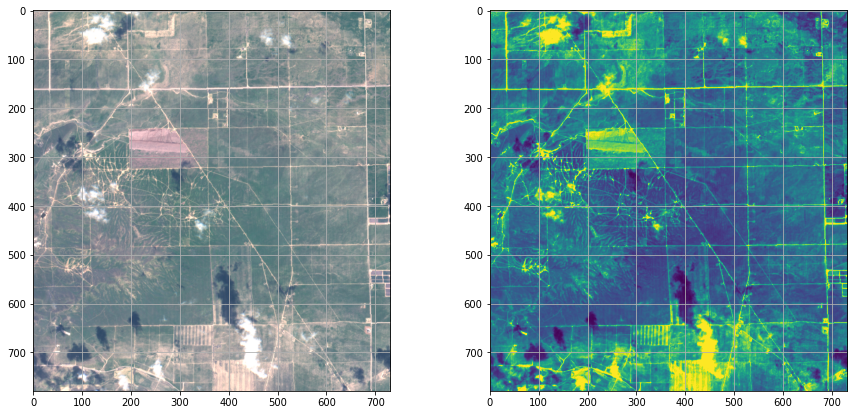

In [16]:
fig, ax = show_image(antelope_neg)

## Lake Elsinore

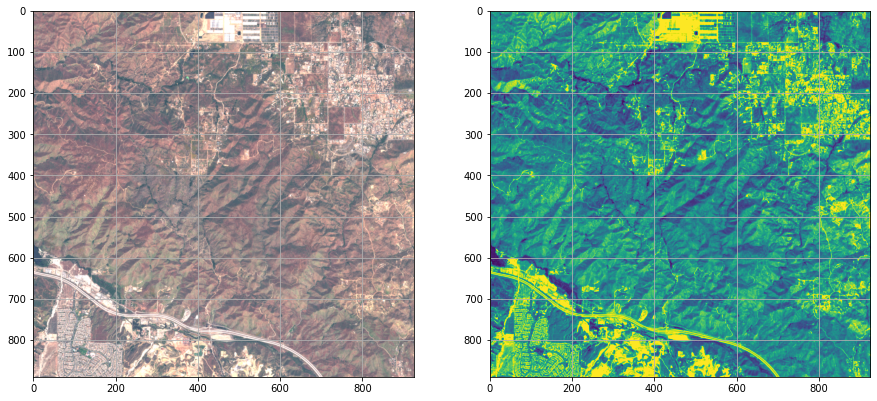

In [17]:
fig, ax = show_image(elsinore_neg)

## Grass Mountain

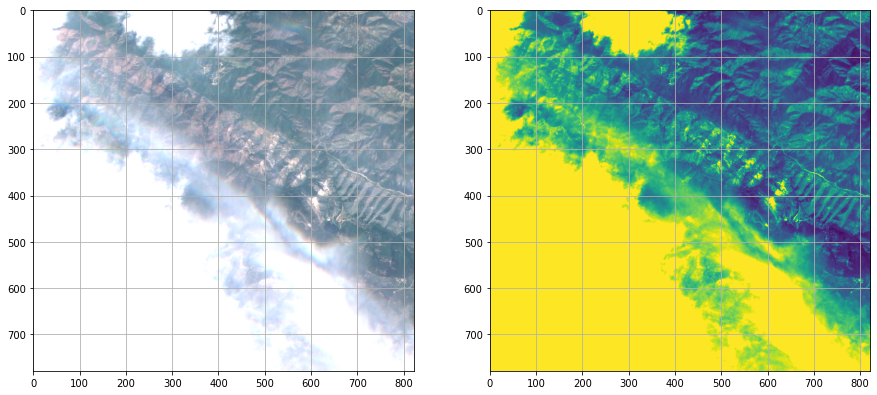

In [18]:
fig, ax = show_image(grassmtn_neg)

In [19]:
#get get 3 times as many negative pixels compared to positive pixels
n = poppy_pos.shape[0]

poppy_neg_antelope = get_neg(antelope_neg, n, antelope_negpix_iter0)
poppy_neg_elsinore = get_neg(elsinore_neg, n, elsinore_negpix_iter0)
poppy_neg_grassmtn = get_neg(grassmtn_neg, n, grassmtn_negpix_iter0)

poppy_neg = np.concatenate((poppy_neg_antelope, poppy_neg_elsinore, poppy_neg_grassmtn), axis=0)

In [20]:
poppy_neg.shape

(48318, 13)

# Save the labelled pixel data
### Also save the Boolean arrays that keep track of which pixels have been labelled

In [21]:
#labelled pixel data
np.save('/home/esther/poppy-finder/data/poppy_pos.npy', poppy_pos)
np.save('/home/esther/poppy-finder/data/poppy_neg.npy', poppy_neg)

#boolean arrays
np.save('/home/esther/poppy-finder/data/antelope_pospix_iter0.npy', antelope_pospix_iter0)
np.save('/home/esther/poppy-finder/data/antelope_negpix_iter0.npy', antelope_negpix_iter0)
np.save('/home/esther/poppy-finder/data/elsinore_pospix_iter0.npy', elsinore_pospix_iter0)
np.save('/home/esther/poppy-finder/data/elsinore_negpix_iter0.npy', elsinore_negpix_iter0)
np.save('/home/esther/poppy-finder/data/grassmtn_pospix_iter0.npy', grassmtn_pospix_iter0)
np.save('/home/esther/poppy-finder/data/grassmtn_negpix_iter0.npy', grassmtn_negpix_iter0)